Loading Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler


Load Dataset

In [5]:
test_dataset_path= r"house-prices-advanced-regression-techniques\test.csv"
train_dataset_path =r"house-prices-advanced-regression-techniques\train.csv"


df_test = pd.read_csv(test_dataset_path)
df_train = pd.read_csv(train_dataset_path)

looking at test.csv and train.csv shapes

In [6]:
df_test.shape


(1459, 80)

In [7]:
df_train.shape

(1460, 81)

Lets take a look at our data set

In [8]:
#used to display all the columns 
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [9]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Understanding the Data using data_descrription

Give the rating according to the quality by communicating with the domain experts because we need to change str to int to train the model

Data Pre-Processing
Know your Data

Data Integration

In [11]:
df = pd.concat([df_train, df_test])
df.shape

(2919, 81)

In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [13]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


Getting the Brief Info of the Dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [15]:
int_features = df.select_dtypes(include=["int64"]).columns
print('Total numbers of integer features:', int_features.shape[0])
print("Integer feature names : ", int_features.tolist)

Total numbers of integer features: 26
Integer feature names :  <bound method IndexOpsMixin.tolist of Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')>


In [16]:
float_features = df.select_dtypes(include=["float64"]).columns
print('Total numbers of float features:', float_features.shape[0])
print("Float feature names : ", float_features.tolist)

Total numbers of float features: 12
Float feature names :  <bound method IndexOpsMixin.tolist of Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')>


In [17]:
cat_features = df.select_dtypes(include=["object"]).columns
print('Total numbers of Categorical features:', cat_features.shape[0])
print("Categorical feature names : ", cat_features.tolist)

Total numbers of Categorical features: 43
Categorical feature names :  <bound method IndexOpsMixin.tolist of Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')>


Get Statistical Information of Numerical Features

In [18]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [19]:
df.describe().shape

(8, 38)

Handelling Missing Values

Visualise null/Missing Value

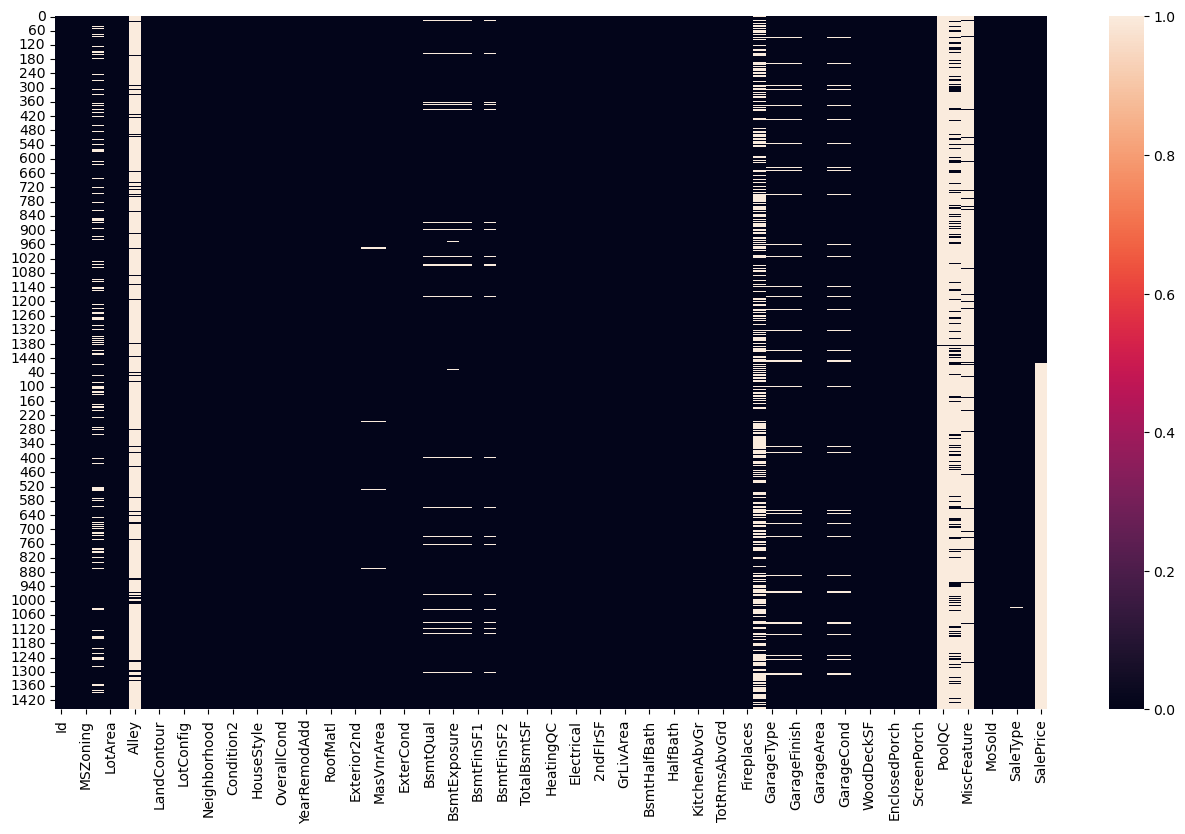

In [20]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/heatmap_DF_of_null_values.png")

Getting the null value percertage of each features

In [21]:
df = df.set_index("Id")

In [22]:
df.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [23]:
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

Drop The Null Columns/Features


##as per ovservation we will not drop any features from dataset

In [24]:
#as per domain knowledge we will not drop the columns instead NAN we will add constant value ""NA 
missing_values_50_per = null_percent [null_percent>50]
missing_values_50_per

Alley          93.216855
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

We are not dropping the columns because according to the domain knowledge and
 data desc we are also given information 

In [25]:
df["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [26]:
#as per domain knowledge we will not drop the columns instead NAN we will add constant value 'Na' """"
missing_values_20_50_per = null_percent[(null_percent >20) & (null_percent < 51)]
missing_values_20_50_per

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [27]:
missing_values_5_20_per = null_percent[(null_percent >5) & (null_percent < 21)]
missing_values_5_20_per

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

In [28]:
df["LotFrontage"].value_counts().head()

60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: LotFrontage, dtype: int64

<Axes: ylabel='Id'>

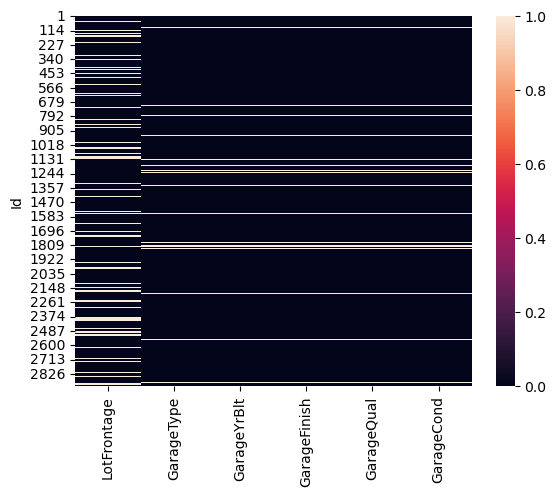

In [29]:
sns.heatmap(df[missing_values_5_20_per.keys()].isnull())

Missing Values Imputation

In [30]:
missing_value_column=null_percent[null_percent > 0]
print("Total missing value columns :", len(missing_value_column))

Total missing value columns : 35


In [31]:
missing_value_column

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [32]:
cat_na_feature=missing_value_column[missing_value_column.keys().isin(cat_features)]
print("Total number of categorcal missing feature/column =", len(cat_na_feature))
cat_na_feature

Total number of categorcal missing feature/column = 23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [33]:
int_na_feature=missing_value_column[missing_value_column.keys().isin(int_features)]
print("Total number of integer missing feature/column =", len(int_na_feature))
int_na_feature

Total number of integer missing feature/column = 0


Series([], dtype: float64)

In [34]:
float_na_feature=missing_value_column[missing_value_column.keys().isin(float_features)]
print("Total number of float missing feature/column =", len(float_na_feature))
float_na_feature

Total number of float missing feature/column = 12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

Handeling MSZoning = 0.137033

In [35]:
df["MSZoning"].dtype

dtype('O')

In [36]:
df["MSZoning"].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

<Axes: xlabel='MSZoning', ylabel='count'>

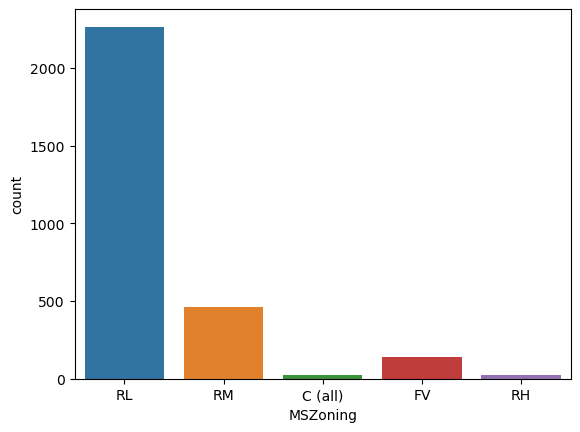

In [37]:
sns.countplot(data=df, x="MSZoning")

In [38]:
##backup of orginal data
df_mvi = df.copy()
df_mvi.shape

(2919, 80)

In [39]:
mszoning_mode = df["MSZoning"].mode()[0]
mszoning_mode

'RL'

In [40]:
df_mvi["MSZoning"].replace(np.nan, mszoning_mode, inplace=True)
df_mvi["MSZoning"].isnull().sum()

0

In [41]:
df_mvi["MSZoning"].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

<Axes: xlabel='MSZoning', ylabel='count'>

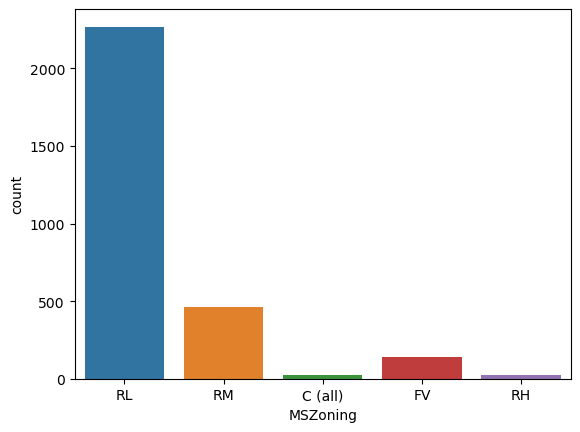

In [42]:
sns.countplot(data=df_mvi, x="MSZoning")

In [43]:
def oldNewCountPlot(df, df_new, feature):
    plt.subplot(121)
    sns.countplot(data=df, x=feature)
    plt.title("Old Data Distribution")
    plt.subplot(122)
    sns.countplot(data=df_new, x=feature)
    plt.title("New Data Distribution")

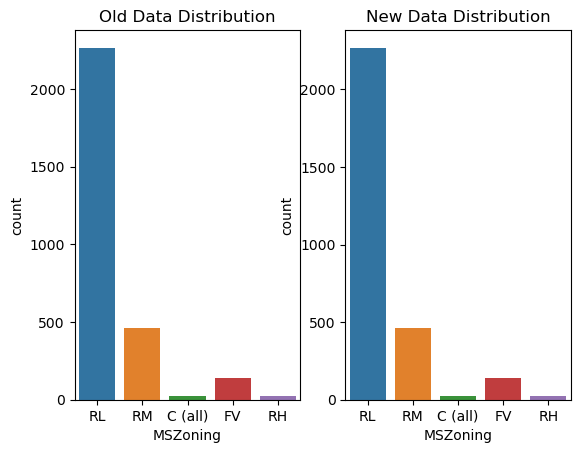

In [44]:
# Call the function with the appropriate DataFrame and feature name
oldNewCountPlot(df, df_mvi, "MSZoning")


Handeling Alley = 93.216855

In [45]:
df_mvi["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [46]:
#since We said befor we will replace NAN with constant value "Na"
alley_const = "Na"
df_mvi["Alley"].replace(np.nan, alley_const, inplace=True)
df_mvi["Alley"].isnull().sum()

0

In [47]:
df_mvi["Alley"].value_counts()

Na      2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

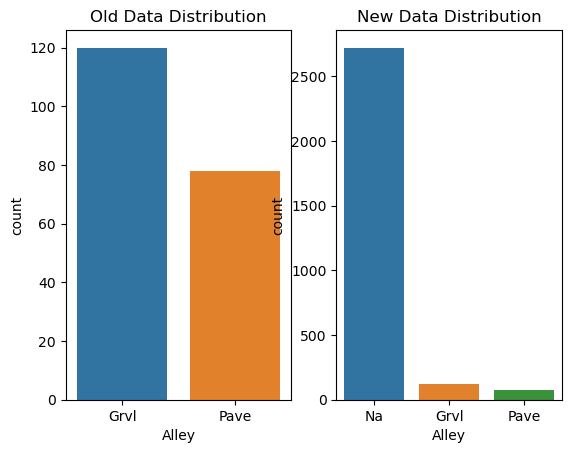

In [48]:
oldNewCountPlot(df, df_mvi, "Alley")

Handeling LotFrontage=16.649538

In [49]:
def boxHistPlot(df, column_name, figsize=(16, 5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(data=df, x=column_name) 
    plt.subplot(122)
    sns.histplot(data=df, x=column_name)
    plt.show()

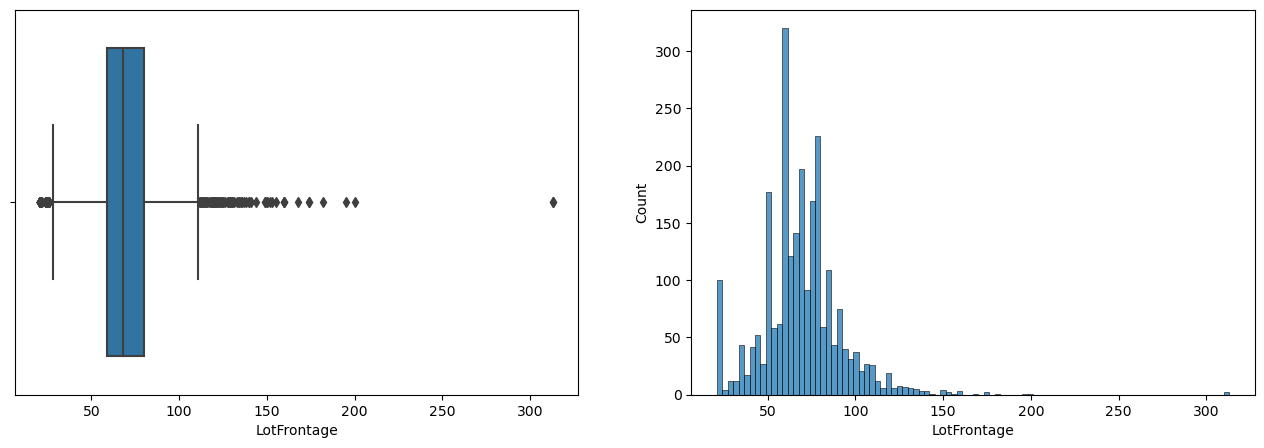

In [50]:
boxHistPlot(df, "LotFrontage")

as we can see the outliers in the chart and according to the histgraph data is right scheewed So whenever our data is right scheewed we take mean value

In [51]:
lotfrontage_mean = df["LotFrontage"].mean()
df_mvi ["LotFrontage"].replace(np.nan, lotfrontage_mean, inplace=True)
df_mvi["LotFrontage"].isnull().sum()

0

In [52]:
def oldNewBoxHistPlot(df, df_new, feature, figsize=(16,10)):
    plt.figure(figsize=figsize)
    plt.subplot(221)
    sns.boxplot(data=df, x=feature)
    plt.title("Old Data Distribution")
    plt.subplot(222)
    sns.histplot(data=df, x=feature)
    plt.title("Old Data Distribution")
    plt.subplot(223)
    sns.boxplot(data=df_new, x=feature)
    plt.title("New Data Distribution")
    plt.subplot(224)
    sns.histplot(data=df_new, x=feature)
    plt.title("New Data Distribution")

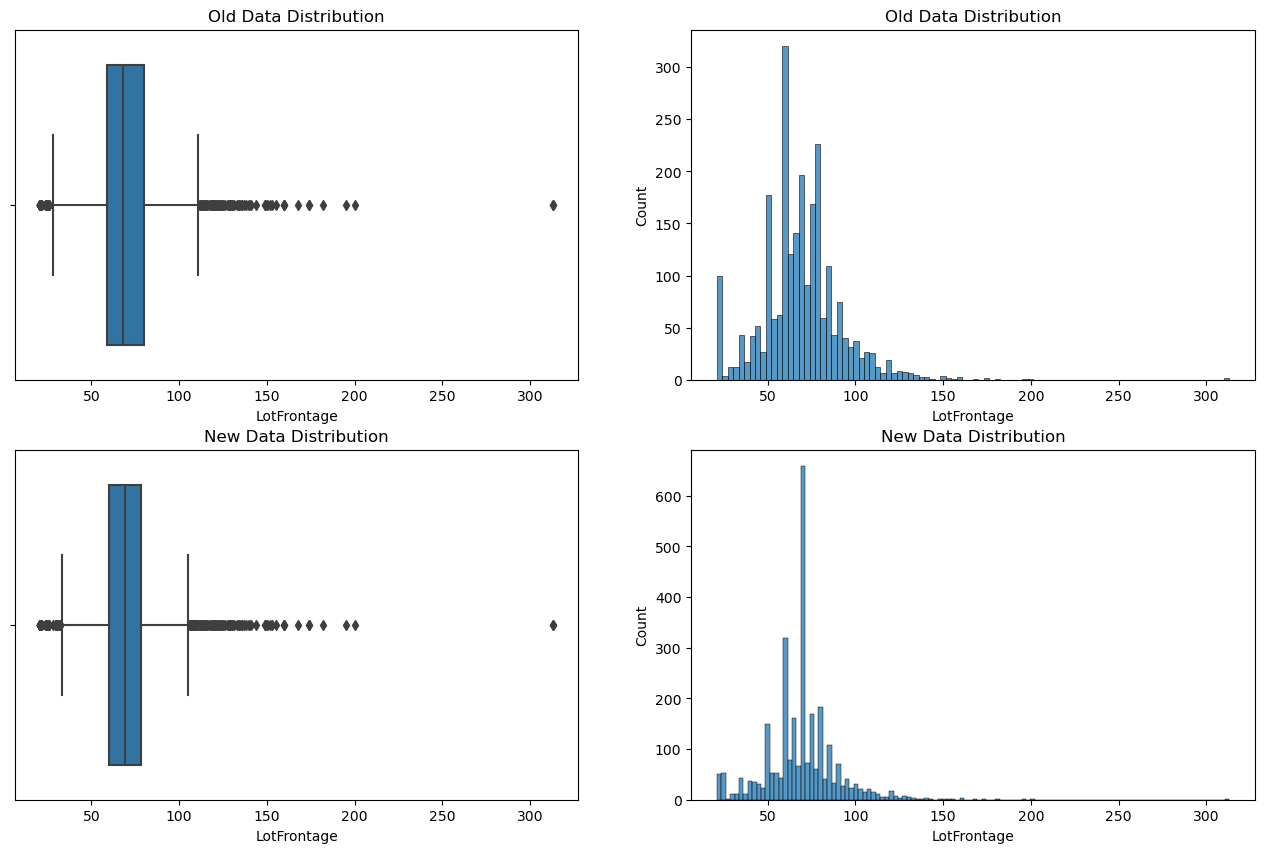

In [53]:
oldNewBoxHistPlot(df, df_mvi, "LotFrontage")

Handeling Utilities=0.068517

In [54]:
df["Utilities"].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

changing null values with mode

In [55]:
utilities_mode = df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan, utilities_mode, inplace=True)
df_mvi["Utilities"].isnull().sum()

0

We are not going to see the distrubution cause it will not make more difference

Handeling Exterior2nd=0.034258 Exterior1st=0.034258

In [56]:
df["Exterior1st"].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [57]:
df["Exterior2nd"].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [58]:
exterior1st_mode = df["Exterior1st"].mode()[0]
exterior2nd_mode = df["Exterior2nd"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan, exterior1st_mode, inplace=True)
df_mvi["Exterior2nd"].replace(np.nan, exterior2nd_mode, inplace=True)
print("E1st is null:", df_mvi["Exterior1st"].isnull().sum())
print("E2nd is null:", df_mvi["Exterior2nd"].isnull().sum())

E1st is null: 0
E2nd is null: 0


Handeling MasVnrType=0.822199 and MasVnrArea=0.787941

<Axes: ylabel='Id'>

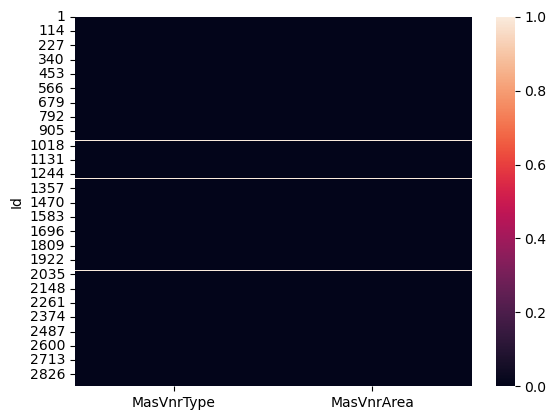

In [59]:
#we will find missingvalues pattern in these both using heatmap
sns.heatmap(df[["MasVnrType", "MasVnrArea"]].isnull())

according to the diagram there are nan values in same part of the data because if there is no an massvnr there cant be any massvnrtype and massvnr area

In [60]:
df["MasVnrType"].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [61]:
masvnrtype_mode = df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].replace(np.nan, masvnrtype_mode, inplace=True)
df_mvi["MasVnrType"].isnull().sum()

0

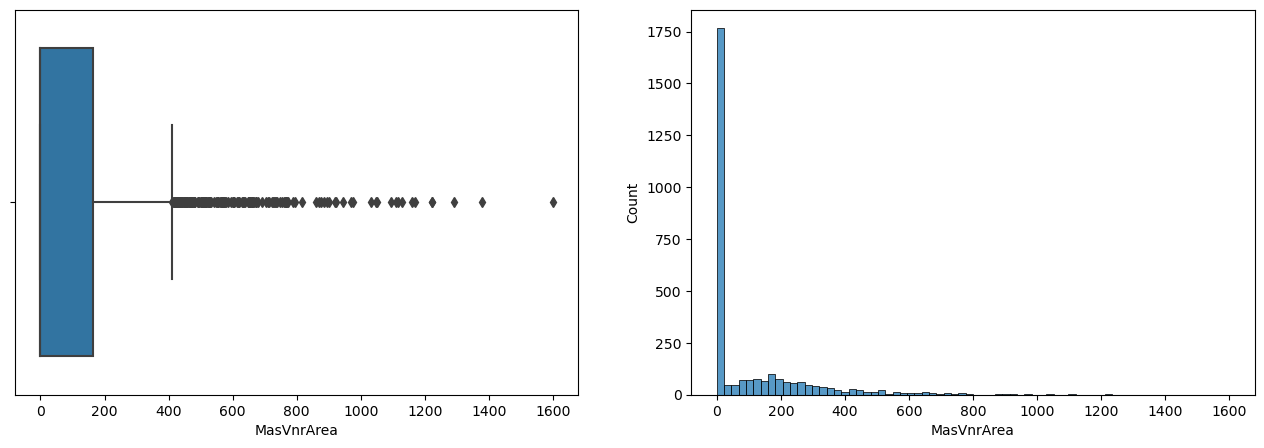

In [62]:
boxHistPlot(df, "MasVnrArea")

In [63]:
masvnrarea_mode = 0
df_mvi["MasVnrArea"].replace(np.nan, masvnrarea_mode, inplace=True)
df_mvi["MasVnrArea"].isnull().sum()

0

handeling BSMT features

In [64]:
cat_bsmt_feat =["BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinType2"]

num_bsmt_feat =["BsmtFinSF1",
"BsmtFinSF2",
"BsmtUnfSF",
"TotalBsmtSF",
"BsmtFullBath",
"BsmtHalfBath"]

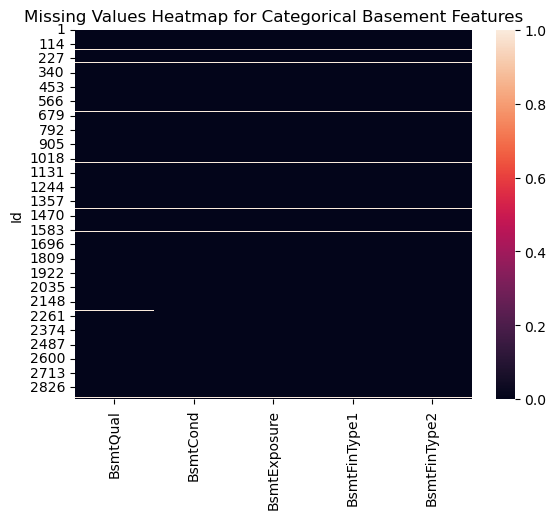

In [65]:
sns.heatmap(df[cat_bsmt_feat].isnull())
plt.title("Missing Values Heatmap for Categorical Basement Features")
plt.show()

In [66]:
for  feat in cat_bsmt_feat:
    print(f"Value count of {feat}:\n{df[feat].value_counts()}\n")

Value count of BsmtQual:
TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

Value count of BsmtCond:
TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

Value count of BsmtExposure:
No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

Value count of BsmtFinType1:
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

Value count of BsmtFinType2:
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64



In [67]:
bsmt_cont = "NA"
for  feat in cat_bsmt_feat:
    df_mvi[feat].replace(np.nan, bsmt_cont, inplace=True)

In [68]:
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

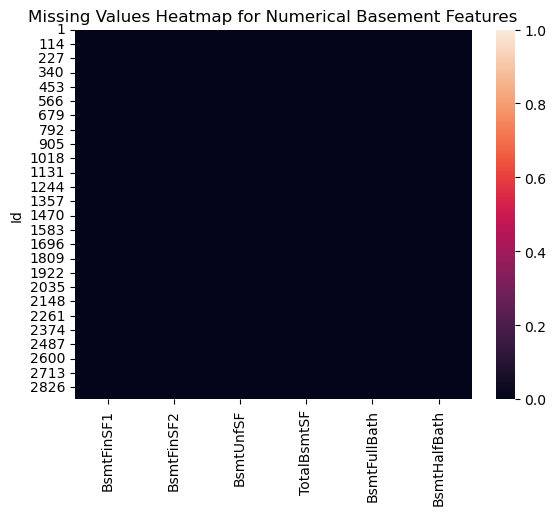

In [69]:
sns.heatmap(df[num_bsmt_feat].isnull())
plt.title("Missing Values Heatmap for Numerical Basement Features")
plt.show()

In [70]:
df_bsmt= df[cat_bsmt_feat + num_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis = 1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
260,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
333,Gd,TA,No,GLQ,NaN,1124.0,479.0,1603.0,3206.0,1.0,0.0
343,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
bsmt_num = "0"
for  feat in num_bsmt_feat:
    df_mvi[feat].replace(np.nan, bsmt_num, inplace=True)

In [72]:
df_mvi[num_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

Handeling Electrical=0.034258
KitchenQual=0.034258

In [73]:
df["Electrical"].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [74]:
df["KitchenQual"].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [75]:
df_ekk = df[["Electrical", "KitchenQual", "KitchenAbvGr"]]
df_ekk[df_ekk.isnull().any(axis = 1)]

,Electrical,KitchenQual,KitchenAbvGr
Id,,,
1380,NaN,Gd,1
1556,SBrkr,NaN,1


since we cant find any patterns we will be using mode

In [76]:
electrical_mode = df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan, electrical_mode, inplace=True)
df_mvi["Electrical"].isnull().sum()

0

In [77]:
kitchenQual_mode = df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan, kitchenQual_mode, inplace=True)
df_mvi["KitchenQual"].isnull().sum()

0

Handeling Remaining cat features

In [78]:
df["Functional"].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [79]:
df["SaleType"].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [80]:
functional_mode = df["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan, functional_mode, inplace=True)
df_mvi["Functional"].isnull().sum()

0

In [81]:
saletype_mode = df["SaleType"].mode()[0]
df_mvi["SaleType"].replace(np.nan, saletype_mode, inplace=True)
df_mvi["SaleType"].isnull().sum()

0

In [82]:
other_cat_feat = ["FireplaceQu",
"PoolQC",
"Fence",
"MiscFeature"]

for feat in other_cat_feat:
    print(f"Value count of {feat}: {df[feat].value_counts()}")

Value count of FireplaceQu: Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64
Value count of PoolQC: Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64
Value count of Fence: MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64
Value count of MiscFeature: Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64


In [83]:
fireplacequ_cont = "NA"
df_mvi["FireplaceQu"].replace(np.nan, fireplacequ_cont, inplace=True)
df_mvi["FireplaceQu"].isnull().sum()

0

In [84]:
poolqc_cont = "NA"
df_mvi["PoolQC"].replace(np.nan, poolqc_cont, inplace=True)
df_mvi["PoolQC"].isnull().sum()

0

In [85]:
fence_cont = "NA"
df_mvi["Fence"].replace(np.nan, fence_cont, inplace=True)
df_mvi["Fence"].isnull().sum()

0

In [86]:
miscfeature_cont = "NA"
df_mvi["MiscFeature"].replace(np.nan, miscfeature_cont, inplace=True)
df_mvi["MiscFeature"].isnull().sum()

0

Handeling Garage Feature

In [87]:
garagetype_cont = "NA"
df_mvi["GarageType"].replace(np.nan, garagetype_cont, inplace=True)
df_mvi["GarageType"].isnull().sum()

0

In [88]:
garagefinish_cont = "NA"
df_mvi["GarageFinish"].replace(np.nan, garagefinish_cont, inplace=True)
df_mvi["GarageFinish"].isnull().sum()

0

In [89]:
garagequal_cont = "NA"
df_mvi["GarageQual"].replace(np.nan, garagequal_cont, inplace=True)
df_mvi["GarageQual"].isnull().sum()

0

In [90]:
garagecond_cont = "NA"
df_mvi["GarageCond"].replace(np.nan, garagecond_cont, inplace=True)
df_mvi["GarageCond"].isnull().sum()

0

In [91]:
 num_garage_feat=["GarageYrBlt",
"GarageCars",
"GarageArea"]

In [92]:
garage_num=0
for feat in num_garage_feat :
    df_mvi[feat].replace(np.nan, garage_num, inplace=True)

df_mvi[num_garage_feat].isnull().sum()

GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [93]:
df_mvi.isnull().any(axis = 1).sum()

1459

Feature Transformation Converting Numerical to Categorical

In [94]:
for_num_conv = ["MSSubClass", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold", "MoSold"]
for feat in for_num_conv:
    print(f"(feat): data type - {df_mvi[feat].dtype}")

(feat): data type - int64
(feat): data type - int64
(feat): data type - int64
(feat): data type - float64
(feat): data type - int64
(feat): data type - int64


In [95]:
df_mvi[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,MoSold
Id,,,,,,
1,60,2003,2003,2003.0,2008,2
2,20,1976,1976,1976.0,2007,5
3,60,2001,2002,2001.0,2008,9
4,70,1915,1970,1998.0,2006,2
5,60,2000,2000,2000.0,2008,12


In [96]:
calendar.month_abbr[1]

'Jan'

In [97]:
df_mvi["MoSold"] = df_mvi["MoSold"].apply(lambda x: calendar.month_abbr[x])

In [98]:
df_mvi["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [99]:
for feat in for_num_conv :
    df_mvi[feat] = df_mvi[feat].astype(str)

In [100]:
for_num_conv = ["MSSubClass", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold", "MoSold"]
for feat in for_num_conv:
    print(f"(feat): data type - {df_mvi[feat].dtype}")

(feat): data type - object
(feat): data type - object
(feat): data type - object
(feat): data type - object
(feat): data type - object
(feat): data type - object


Converting Categorical Features into Numerical

Orginal Encoding

In [101]:
ordinal_end_var = [
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "BsmtFinSF1",
    "HeatingQc",
    "KitchenQual",
    "FireplaceQU",
    "GarageQual",
    "GarageCond",
    "PoolQC",
    "Functional",
    "GarageFinish",
    "PavedDrive",
    "Utilities"
]
print("total number of features to convert ordinal numerical format : ", len(ordinal_end_var))

total number of features to convert ordinal numerical format :  18


In [102]:

df_mvi["ExterQual"]= df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd","Ex"], ordered=True)).cat.codes

In [103]:
df_mvi["ExterCond"]=df_mvi["ExterCond"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd","Ex"], ordered=True)).cat.codes

In [104]:
df_mvi["BsmtQual"]=df_mvi["BsmtQual"].astype(CategoricalDtype(categories=["NA","Po", "Fa", "TA", "Gd","Ex"], ordered=True)).cat.codes

In [105]:
df_mvi["BsmtCond"]=df_mvi["BsmtCond"].astype(CategoricalDtype(categories=["NA","Po", "Fa", "TA", "Gd","Ex"], ordered=True)).cat.codes

In [106]:
df_mvi["BsmtExposure"]=df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=["NA", "No", "Mn", "Av", "Gd"], ordered=True)).cat.codes

In [107]:
df_mvi["BsmtFinType1"]=df_mvi["BsmtFinType1"].astype(CategoricalDtype(categories=["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], ordered=True)).cat.codes
df_mvi["BsmtFinType2"]=df_mvi["BsmtFinType2"].astype(CategoricalDtype(categories=["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], ordered=True)).cat.codes
df_mvi["BsmtFinSF1"]=df_mvi["BsmtFinSF1"].astype(CategoricalDtype(categories=["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], ordered=True)).cat.codes


In [108]:
df_mvi["HeatingQC"] = df_mvi["HeatingQC"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes


In [109]:
df_mvi["KitchenQual"]=df_mvi["KitchenQual"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd","Ex"], ordered=True)).cat.codes

In [110]:
df_mvi["FireplaceQu"] = df_mvi["FireplaceQu"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes

In [111]:
df_mvi["GarageQual"]=df_mvi["GarageQual"].astype(CategoricalDtype(categories=["NA","Po", "Fa", "TA", "Gd","Ex"], ordered=True)).cat.codes
df_mvi["GarageCond"]=df_mvi["GarageCond"].astype(CategoricalDtype(categories=["NA","Po", "Fa", "TA", "Gd","Ex"], ordered=True)).cat.codes
df_mvi["PoolQC"]=df_mvi["PoolQC"].astype(CategoricalDtype(categories=["NA", "Fa", "TA", "Gd","Ex"], ordered=True)).cat.codes

In [112]:
df_mvi["Functional"]=df_mvi["Functional"].astype(CategoricalDtype(categories=["Typ","Min1","Min2","Mod","Maj1","Maj2","Sev","Sal"], ordered=True)).cat.codes

In [113]:
df_mvi["GarageFinish"]=df_mvi["GarageFinish"].astype(CategoricalDtype(categories=["Fin","RFn","Unf","NA"], ordered=True)).cat.codes

In [114]:
df_mvi["PavedDrive"]=df_mvi["PavedDrive"].astype(CategoricalDtype(categories=["N","P","Y"], ordered=True)).cat.codes

In [115]:
df_mvi["Utilities"]=df_mvi["Utilities"].astype(CategoricalDtype(categories=["AllPub","NoSewr","NoSeWa","ELO"], ordered=True)).cat.codes

In [116]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

Converting Hot Encoding  for Nominal Categorical Data

In [117]:
object_columns = df_mvi.select_dtypes(include=['object'])
print(object_columns.columns)

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'CentralAir',
       'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'GarageType',
       'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [118]:
df_mvi[["BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]].head()

,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,
1,0.0,150.0,856.0,1.0,0.0
2,0.0,284.0,1262.0,0.0,1.0
3,0.0,434.0,920.0,1.0,0.0
4,0.0,540.0,756.0,1.0,0.0
5,0.0,490.0,1145.0,1.0,0.0


In [119]:
column_names = ["BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]
data_types = df_mvi[column_names].dtypes
print(data_types)

BsmtFinSF2      object
BsmtUnfSF       object
TotalBsmtSF     object
BsmtFullBath    object
BsmtHalfBath    object
dtype: object


In [120]:
for column in column_names:
    unique_values = df_mvi[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in BsmtFinSF2: [0.0 32.0 668.0 486.0 93.0 491.0 506.0 712.0 362.0 41.0 169.0 869.0 150.0
 670.0 28.0 1080.0 181.0 768.0 215.0 374.0 208.0 441.0 184.0 279.0 306.0
 180.0 580.0 690.0 692.0 228.0 125.0 1063.0 620.0 175.0 820.0 1474.0 264.0
 479.0 147.0 232.0 380.0 544.0 294.0 258.0 121.0 391.0 531.0 344.0 539.0
 713.0 210.0 311.0 1120.0 165.0 532.0 96.0 495.0 174.0 1127.0 139.0 202.0
 645.0 123.0 551.0 219.0 606.0 612.0 480.0 182.0 132.0 336.0 468.0 287.0
 35.0 499.0 723.0 119.0 40.0 117.0 239.0 80.0 472.0 64.0 1057.0 127.0
 630.0 128.0 377.0 764.0 345.0 1085.0 435.0 823.0 500.0 290.0 324.0 634.0
 411.0 841.0 1061.0 466.0 396.0 354.0 149.0 193.0 273.0 465.0 400.0 682.0
 557.0 230.0 106.0 791.0 240.0 547.0 469.0 177.0 108.0 600.0 492.0 211.0
 168.0 1031.0 438.0 375.0 144.0 81.0 906.0 608.0 276.0 661.0 68.0 173.0
 972.0 105.0 420.0 546.0 334.0 352.0 872.0 110.0 627.0 163.0 1029.0 78.0
 859.0 981.0 42.0 46.0 162.0 350.0 263.0 1073.0 12.0 159.0 474.0 453.0
 684.0 387.0 688.0 252

I found Some columns with null value

In [121]:
df[column_names].isnull().sum()

BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
dtype: int64

In [122]:
for column in column_names:
    df_mvi[column] = pd.to_numeric(df_mvi[column], errors="coerce")

    # Replace non-numeric values (like '0') with NaN
    df_mvi[column].replace(0, np.nan, inplace=True)


In [123]:
df[column_names].isnull().sum()

BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
dtype: int64

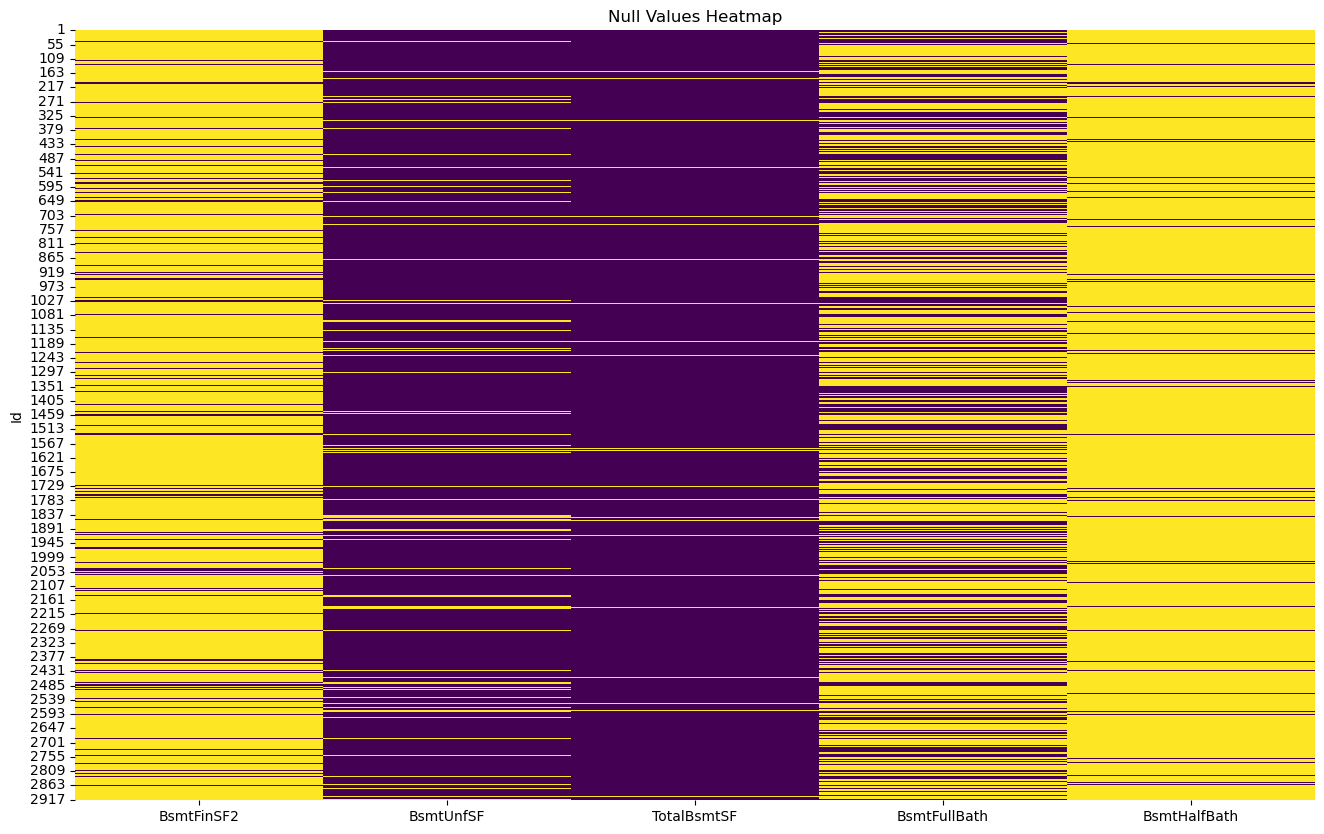

In [124]:
# Create a subset DataFrame containing only the specified columns
subset_df = df_mvi[column_names]

# Create a heatmap of null values
plt.figure(figsize=(16, 10))
sns.heatmap(subset_df.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [125]:
df_mvi[column_names].isnull().mean() * 100

BsmtFinSF2      88.112367
BsmtUnfSF        8.290510
TotalBsmtSF      2.706406
BsmtFullBath    58.478931
BsmtHalfBath    94.004796
dtype: float64

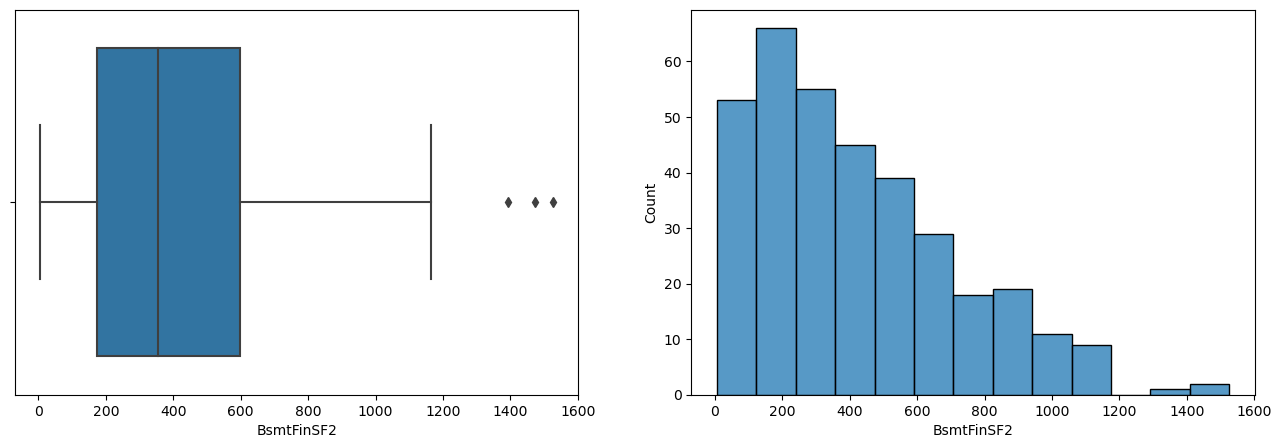

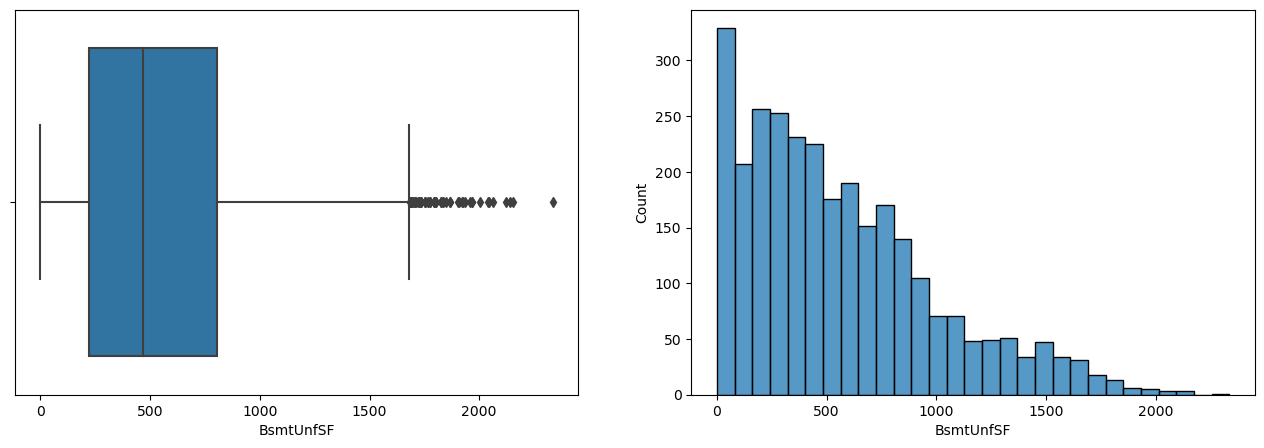

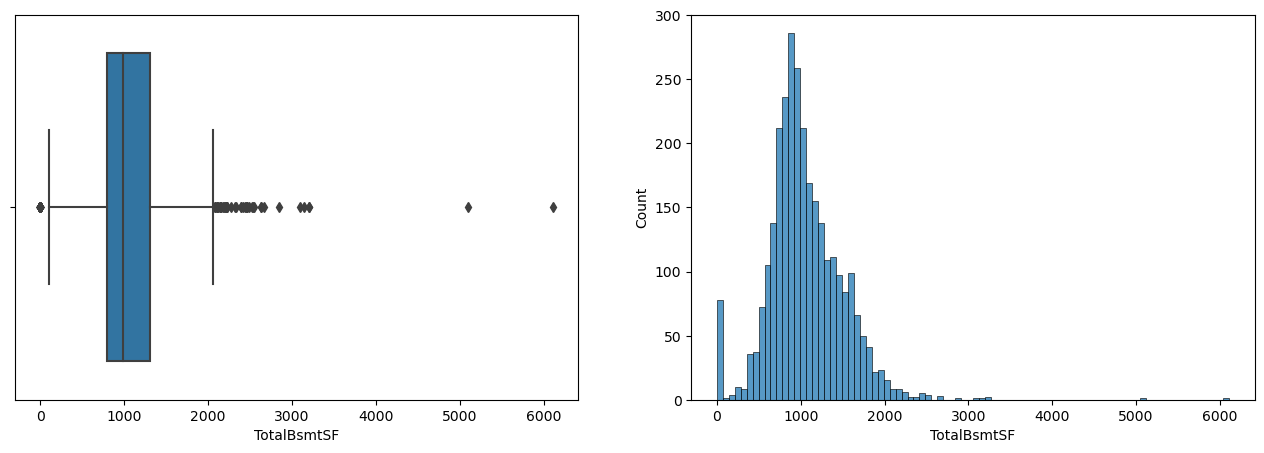

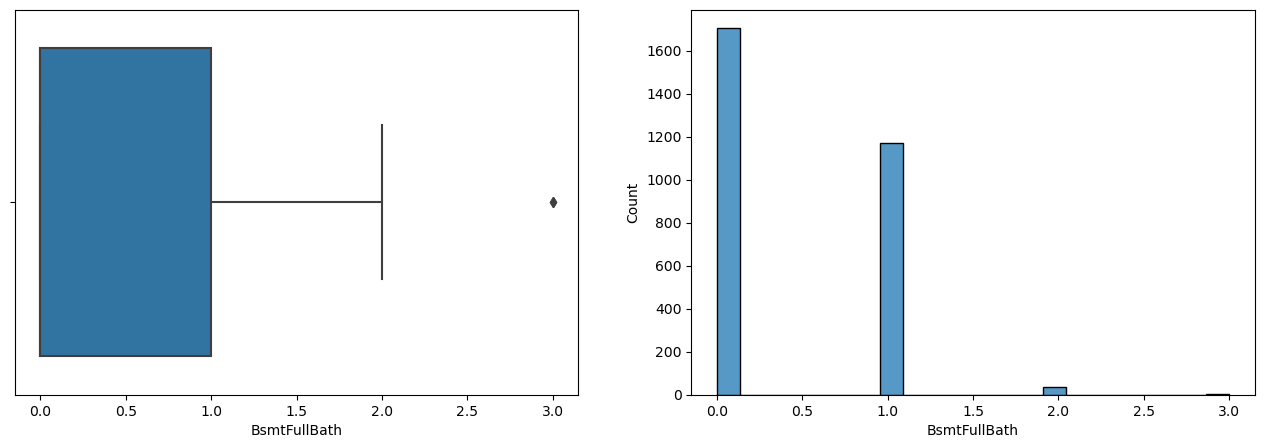

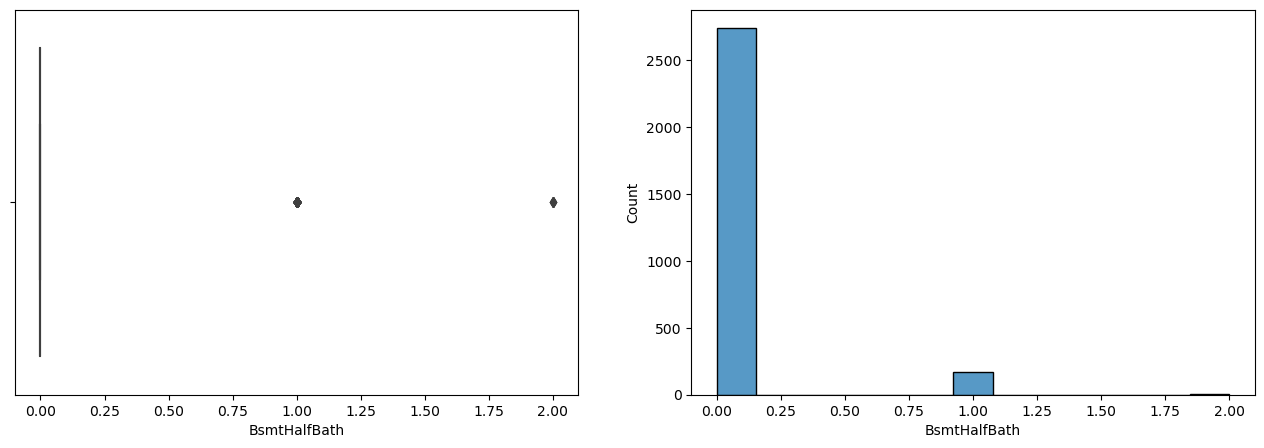

In [126]:
boxHistPlot(df_mvi, "BsmtFinSF2")
boxHistPlot(df, "BsmtUnfSF")
boxHistPlot(df, "TotalBsmtSF")
boxHistPlot(df, "BsmtFullBath")
boxHistPlot(df, "BsmtHalfBath")

In [127]:
df_mvi.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2       2572
BsmtUnfSF         242
TotalBsmtSF        79
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [128]:
for column in column_names:
    df_mvi[column].fillna(0, inplace=True)

In [129]:
df_mvi.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

One Hot Encoding for Nominal Categorical Data

In [130]:
df_encod = df_mvi.copy()
object_features= df_encod.select_dtypes(include = "object"). columns.tolist()

In [131]:
print("Total object data type features :", len(object_features))
print("features \n :", object_features)

Total object data type features : 32
features 
 : ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [132]:
df_encod[object_features].head(2)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,GarageYrBlt,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,Na,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd,2003.0,NA,NA,Feb,2008,WD,Normal
2,20,RL,Pave,Na,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,Attchd,1976.0,NA,NA,May,2007,WD,Normal


In [133]:
df_encod= pd.get_dummies(df_encod, columns = object_features, prefix = object_features, drop_first=True)

In [134]:
df_encod.head()

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Na,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1875,YearBuilt_1879,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1895,YearBuilt_1896,YearBuilt_1898,YearBuilt_1900,YearBuilt_1901,YearBuilt_1902,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1907,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_19

In [135]:
df_encod.shape

(2919, 513)

Splitting Data For Training And Testing

In [136]:
len_train= df_train.shape[0]
len_train

1460

In [137]:
x_train = df_encod[:len_train].drop("SalePrice", axis = 1)
y_train = df_encod["SalePrice"][:len_train]

x_test = df_encod[len_train : ].drop("SalePrice", axis = 1)
print("Shape of x_train data :" , x_train.shape)
print("Shape of y_train data :" , y_train.shape)
print("Shape of x_test data :" , x_test.shape)

Shape of x_train data : (1460, 512)
Shape of y_train data : (1460,)
Shape of x_test data : (1459, 512)


FEATURE SCALING

In [138]:
sc = StandardScaler()
sc.fit(x_train)
#formula = z=(x-u)/s

x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [139]:
x_train[:3, :]

array([[-0.22335706, -0.20714171, -0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.45789401, -0.09188637, -0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08710685,  0.07347998, -0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [140]:
x_test[:3, :]

array([[ 0.45789401,  0.11076257, -0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.50331075,  0.37584985, -0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.18539358,  0.33205282, -0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [141]:
##carry forward for development
# sc.mean_
# sc.n_features_in_
# sc.n_samples_seen_
# sc.scale_
# sc.var_
# sc.with_mean
# sc.with_std

Train ML Model

In [142]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [143]:
svr = SVR()
lr = LinearRegression ()
sgdr = SGDRegressor()
knr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgbr = XGBRegressor()
mlpr = MLPRegressor()
ir = IsotonicRegression()

In [144]:
models = {
    "a" : ["LinearRegression", lr],
    "b" : ["SRV", svr],
    "c" : ["SGDRegressor", sgdr],
    "d" : ["KNeighborsRegressor", knr],
    "e" : ["GaussianProcessRegressor", gpr],
    "f" : ["DecisionTreeRegressor", dtr],
    "g" : ["GradientBoostingRegressor",gbr],
    "h" : ["RandomForestRegressor", rfr],
    "i" : ["XGBRegressor", xgbr],
    "j" : ["MLPRegressor", mlpr],
    "k" : ["IsotonicRegression", ir]
}

Cross Validation for evaluating model

In [145]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=x_train, y_train=y_train):
    cv = KFold(n_splits=7, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, x_train, y_train, cv=cv, scoring=r2)
    score = [r2_val_score.mean()]
    return score

In [146]:
models_score = []  # Corrected variable name

for model_name, (model_description, model_instance) in models.items():
    print("Training model:", model_description)
    score = test_model(model_instance, x_train, y_train)
    print("Score of model:", score)
    models_score.append([model_description, score[0]])  # Use the correct list name

# Now you have the list models_score containing model names and their scores


Training model: LinearRegression
Score of model: [-6.57719554223065e+24]
Training model: SRV
Score of model: [-0.052131544569553885]
Training model: SGDRegressor
Score of model: [-2378.003986892044]
Training model: KNeighborsRegressor
Score of model: [0.5618993893608673]
Training model: GaussianProcessRegressor
Score of model: [-5.39890707172488]
Training model: DecisionTreeRegressor
Score of model: [0.6874127526287898]
Training model: GradientBoostingRegressor
Score of model: [0.8719309651192948]
Training model: RandomForestRegressor
Score of model: [0.847454551361884]
Training model: XGBRegressor
Score of model: [0.8400585301918175]
Training model: MLPRegressor


c:\Users\ADMIN\miniconda3\envs\minimal_ds\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ADMIN\miniconda3\envs\minimal_ds\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ADMIN\miniconda3\envs\minimal_ds\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ADMIN\miniconda3\envs\minimal_ds\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\U

Score of model: [-4.815716108577681]
Training model: IsotonicRegression


ValueError: 
All the 7 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ADMIN\miniconda3\envs\minimal_ds\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ADMIN\miniconda3\envs\minimal_ds\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ADMIN\miniconda3\envs\minimal_ds\Lib\site-packages\sklearn\isotonic.py", line 351, in fit
    X, y = self._build_y(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ADMIN\miniconda3\envs\minimal_ds\Lib\site-packages\sklearn\isotonic.py", line 266, in _build_y
    self._check_input_data_shape(X)
  File "c:\Users\ADMIN\miniconda3\envs\minimal_ds\Lib\site-packages\sklearn\isotonic.py", line 250, in _check_input_data_shape
    raise ValueError(msg)
ValueError: Isotonic regression input X should be a 1d array or 2d array with 1 feature


In [147]:
models_score

[['LinearRegression', -6.57719554223065e+24],
 ['SRV', -0.052131544569553885],
 ['SGDRegressor', -2378.003986892044],
 ['KNeighborsRegressor', 0.5618993893608673],
 ['GaussianProcessRegressor', -5.39890707172488],
 ['DecisionTreeRegressor', 0.6874127526287898],
 ['GradientBoostingRegressor', 0.8719309651192948],
 ['RandomForestRegressor', 0.847454551361884],
 ['XGBRegressor', 0.8400585301918175],
 ['MLPRegressor', -4.815716108577681]]

Since Gradient Boosting has more accuracy we will use gradient boosting

In [148]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
predictions_df = pd.DataFrame({'Predicted_Labels': y_pred})
predictions_df.to_csv('found.csv', index=False)